<a href="https://colab.research.google.com/github/ssilb4/colab/blob/jeju/jeju_datalab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ssilb4/gitflow/master/data/output_datalab3.csv?token=AEXPY5B5XNUENTQARQRPQNS7CUPAE')

In [ ]:
df['위치'].unique()

array(['서울특별시', '경기도', '부산광역시', '경상남도', '인천광역시', '대구광역시', '경상북도', '강원도',
       '충청남도', '전라남도', '대전광역시', '울산광역시', '충청북도', '전라북도', '제주특별자치도',
       '광주광역시'], dtype=object)

In [ ]:
import matplotlib.pyplot as plt

df_seoul = df[df['위치']=='서울특별시']
df_seoul.index = pd.to_datetime(df_seoul["날짜"],format="%Y%m%d")


In [ ]:
import numpy as np

In [ ]:
work_types=['eatery','fbeauty','hobbyenter','leisure','living','tour']

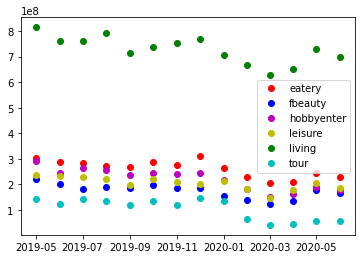

In [ ]:
index = 0
colors = ['ro','bo','mo','yo','go','co']
for work_type in df['업종'].drop_duplicates():
  df_seoul = df[(df['위치']=='서울특별시') & (df['업종']==work_type)]
  df_seoul.index = pd.to_datetime(df_seoul["날짜"],format="%Y%m%d")
  plt.plot(df_seoul.index,df_seoul['매출'],colors[index], label=work_types[index])
  index += 1
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

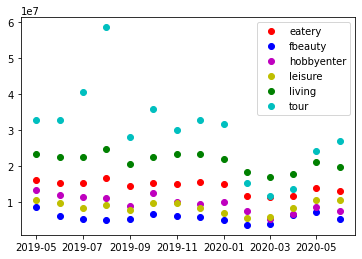

In [ ]:
index = 0
colors = ['ro','bo','mo','yo','go','co']
for work_type in df['업종'].drop_duplicates():
  df_jeju = df[(df['위치']=='제주특별자치도') & (df['업종']==work_type)]
  df_jeju.index = pd.to_datetime(df_jeju["날짜"],format="%Y%m%d")
  plt.plot(df_jeju.index,df_jeju['매출'],colors[index], label=work_type)
  index += 1
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [ ]:
df_group = df.groupby(['위치','날짜'],as_index=False).agg({
    '매출':sum})

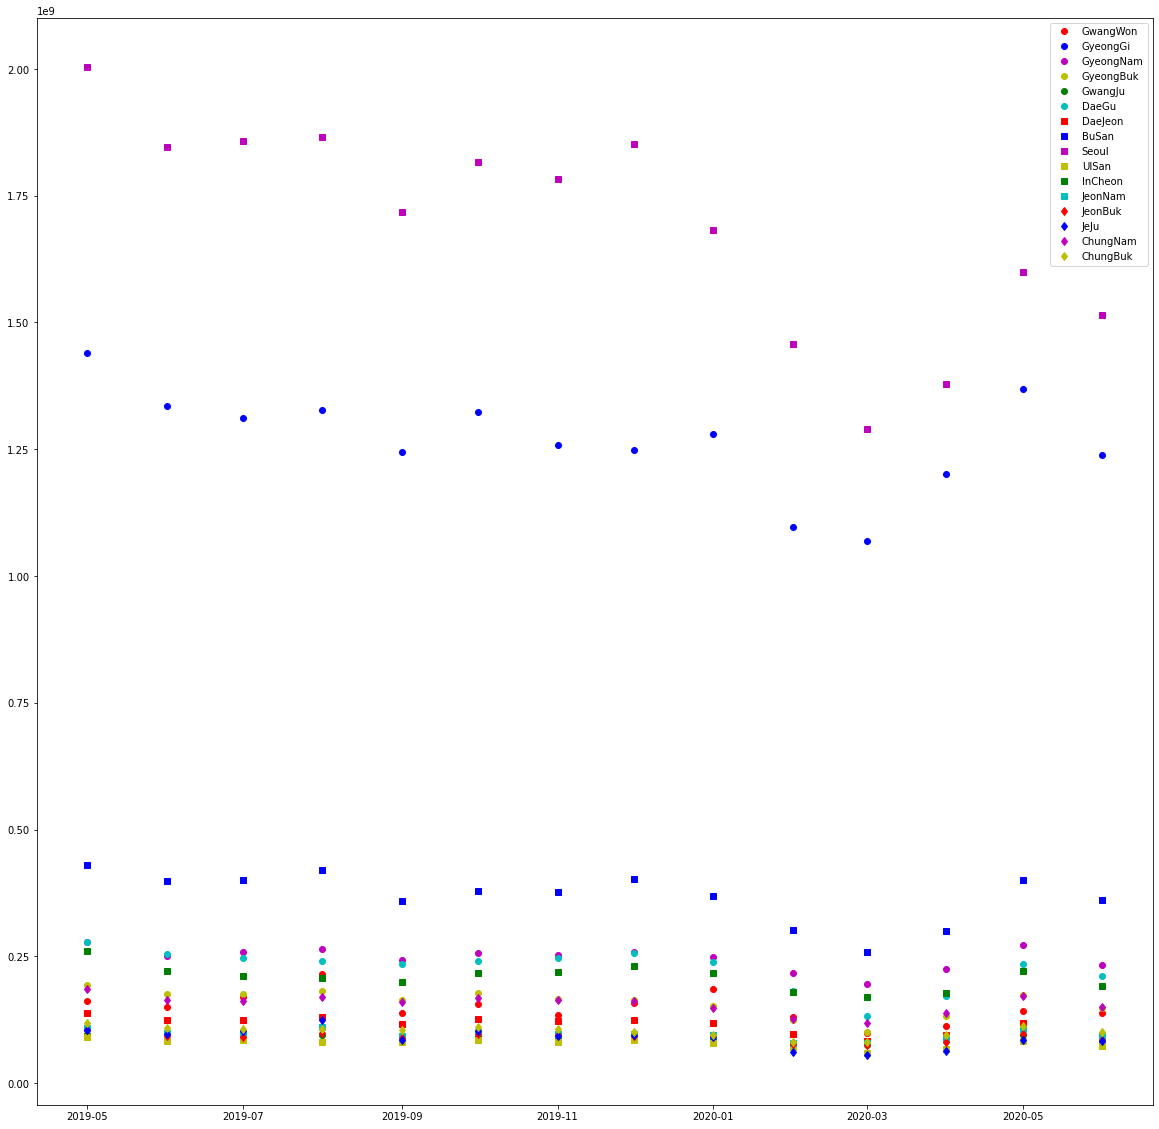

In [ ]:
index = 0
locations=['GwangWon', 'GyeongGi', 'GyeongNam', 'GyeongBuk', 'GwangJu', 'DaeGu', 'DaeJeon', 'BuSan','Seoul', 'UlSan', 'InCheon', 'JeonNam', 'JeonBuk', 'JeJu','ChungNam', 'ChungBuk']
colors = ['ro','bo','mo','yo','go','co',     'rs','bs','ms','ys','gs','cs',    'rd','bd','md','yd','gd','cd']
plt.figure(figsize=(20,20))
for location in df_group['위치'].drop_duplicates():
  df_gorup2 = df_group[df_group['위치']==location]
  df_gorup2.index = pd.to_datetime(df_gorup2["날짜"],format="%Y%m%d")
  plt.plot(df_gorup2.index,df_gorup2['매출'], colors[index], label=locations[index])
  index += 1
  #break
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [ ]:
df_group

,위치,날짜,매출
날짜,,,
2019-05-01,강원도,20190501,161927748
2019-06-01,강원도,20190601,151123928
2019-07-01,강원도,20190701,169376521
2019-08-01,강원도,20190801,215660537
2019-09-01,강원도,20190901,138718796
...,...,...,...
2020-02-01,충청북도,20200201,82016676
2020-03-01,충청북도,20200301,82122100
2020-04-01,충청북도,20200401,95334733


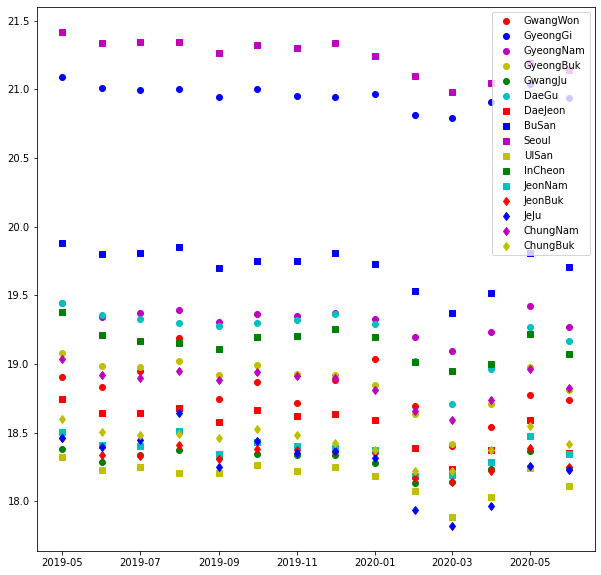

In [ ]:
index = 0
locations=['GwangWon', 'GyeongGi', 'GyeongNam', 'GyeongBuk', 'GwangJu', 'DaeGu', 'DaeJeon', 'BuSan','Seoul', 'UlSan', 'InCheon', 'JeonNam', 'JeonBuk', 'JeJu','ChungNam', 'ChungBuk']
colors = ['ro','bo','mo','yo','go','co',     'rs','bs','ms','ys','gs','cs',    'rd','bd','md','yd','gd','cd']
plt.figure(figsize=(10,10))
for location in df_group['위치'].drop_duplicates():
  df_gorup2 = df_group[df_group['위치']==location]
  df_gorup2.index = pd.to_datetime(df_gorup2["날짜"],format="%Y%m%d")
  train_target = np.log1p(df_gorup2['매출'])
  plt.plot(df_gorup2.index,train_target, colors[index], label=locations[index])
  index += 1
  #break
  #plt.ylabel('some numbers')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

train_ds = lgb.Dataset(x_train, label=y_train)
val_ds = lgb.Dataset(x_val, label=y_val)

params = {
            'learning_rate' : 0.05,
            'boosting_type': 'gbdt',
            'objective': 'tweedie',
            'tweedie_variance_power': 1.1,
            'metric': 'rmse',
            'sub_row' : 0.75,
            'lambda_l2' : 0.1
        }

model = lgb.train(params,
                  train_ds,
                  1000,
                  val_ds,
                  verbose_eval = 100,
                  early_stopping_rounds = 100
                 )

In [ ]:


model = RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(train_features, train_target)

# 예측 템플릿 만들기
CARD_SIDO_NMs = df_num['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df_num['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df_num['HOM_SIDO_NM'].unique()
AGEs          = df_num['AGE'].unique()
SEX_CTGO_CDs  = df_num['SEX_CTGO_CD'].unique()
FLCs          = df_num['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=train_features.columns)

# 예측
pred = model.predict(temp)
pred = np.expm1(pred)
temp['AMT'] = np.round(pred, 0)
temp['REG_YYMM'] = temp['year']*100 + temp['month']
temp = temp[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
temp = temp.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)